# A ver que sale


**Equipo Chiles en Nogada:**


In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
import numpy as np
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/HACKMX2021/Datos/dataBueno.csv")
dataLight = pd.read_csv("/content/drive/MyDrive/HACKMX2021/Datos/tardaMucho.csv")
#data.cnt = data.cnt / data.cnt.max()

data.head(n=5)

Mounted at /content/drive


FileNotFoundError: ignored

# Estadística Descriptiva

Número de renglones

In [ ]:
len(data)

NameError: ignored

Número de columnas

In [ ]:
len(data.columns)


Tabla resumen de las variables

In [ ]:
data.describe()

¿Hay datos nulos?

In [ ]:
data.isnull().sum()

¿Hay datos duplicados?

In [ ]:
data.duplicated().any()

Rangos de las variables:

In [ ]:
#print("step "+str(data["step"].max() - data["step"].min()))
print("amount "+str(data["amount"].max() - data["amount"].min()))
print("oldbalanceOrg "+str(data["oldbalanceOrg"].max() - data["oldbalanceOrg"].min()))
print("newbalanceOrig "+str(data["newbalanceOrig"].max() - data["newbalanceOrig"].min()))
print("oldbalanceDest "+str(data["oldbalanceDest"].max() - data["oldbalanceDest"].min()))
print("newbalanceDest "+str(data["newbalanceDest"].max() - data["newbalanceDest"].min()))
print("isFraud "+str(data["isFraud"].max() - data["isFraud"].min()))
print("isFlaggedFraud "+str(data["isFlaggedFraud"].max() - data["isFlaggedFraud"].min()))


Tipos de datos de las variables

In [ ]:
data.dtypes

Medidas estadísiticas:

In [ ]:
print("Mean: "+str(data["step"].mean()))
print("Median: "+str(data["step"].median()))
print("Min: "+str(data["step"].min()))
print("Max: "+str(data["step"].max()))
print("Std: "+str(data["step"].std()))

In [ ]:
print("Mean: "+str(data["amount"].mean()))
print("Median: "+str(data["amount"].median()))
print("Min: "+str(data["amount"].min()))
print("Max: "+str(data["amount"].max()))
print("Std: "+str(data["amount"].std()))

In [ ]:
print("Mean: "+str(data["oldbalanceOrg"].mean()))
print("Median: "+str(data["oldbalanceOrg"].median()))
print("Min: "+str(data["oldbalanceOrg"].min()))
print("Max: "+str(data["oldbalanceOrg"].max()))
print("Std: "+str(data["oldbalanceOrg"].std()))

In [ ]:
print("Mean: "+str(data["newbalanceOrig"].mean()))
print("Median: "+str(data["newbalanceOrig"].median()))
print("Min: "+str(data["newbalanceOrig"].min()))
print("Max: "+str(data["newbalanceOrig"].max()))
print("Std: "+str(data["newbalanceOrig"].std()))


In [ ]:
print("Mean: "+str(data["oldbalanceDest"].mean()))
print("Median: "+str(data["oldbalanceDest"].median()))
print("Min: "+str(data["oldbalanceDest"].min()))
print("Max: "+str(data["oldbalanceDest"].max()))
print("Std: "+str(data["oldbalanceDest"].std()))

In [ ]:
print("Mean: "+str(data["newbalanceDest"].mean()))
print("Median: "+str(data["newbalanceDest"].median()))
print("Min: "+str(data["newbalanceDest"].min()))
print("Max: "+str(data["newbalanceDest"].max()))
print("Std: "+str(data["newbalanceDest"].std()))

In [ ]:
print("Mean: "+str(data["isFraud"].mean()))
print("Median: "+str(data["isFraud"].median()))
print("Min: "+str(data["isFraud"].min()))
print("Max: "+str(data["isFraud"].max()))
print("Std: "+str(data["isFraud"].std()))

In [ ]:
print("Mean: "+str(data["isFlaggedFraud"].mean()))
print("Median: "+str(data["isFlaggedFraud"].median()))
print("Min: "+str(data["isFlaggedFraud"].min()))
print("Max: "+str(data["isFlaggedFraud"].max()))
print("Std: "+str(data["isFlaggedFraud"].std()))

# Gráficas

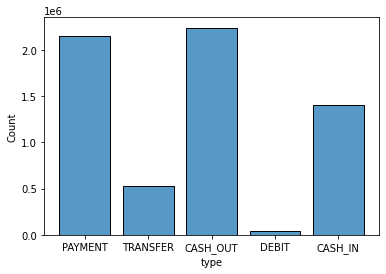

In [ ]:
sas.histplot(data=data, x="type",  shrink=.8)


In [ ]:
newType = {"type": {"PAYMENT":1, "TRANSFER":2, "CASH_OUT":3, "DEBIT":4, "CASH_IN":5}}
data = data.replace(newType)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


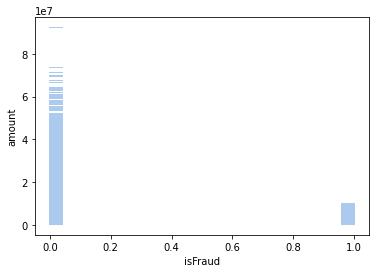

In [ ]:
sas.histplot(data, x="isFraud", y="amount" )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


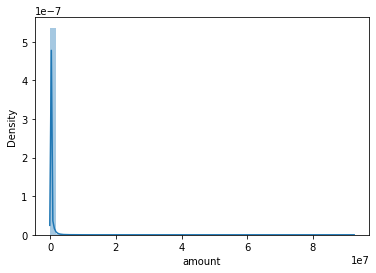

In [ ]:
sas.distplot(data.amount)

OKAY, FALTAN MÁS, PERO NO SÉ QUE PONER

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


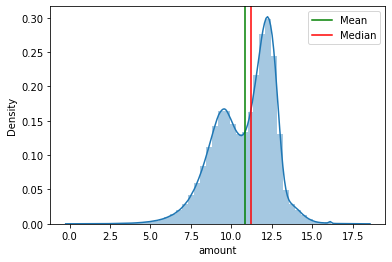

In [ ]:
sas.distplot(np.log1p(data['amount']))
plt.axvline(np.log1p(data['amount']).mean(), color="g", label="Mean")
plt.axvline(np.log1p(data['amount']).median(), color="r", label="Median")
plt.legend()

Podríamos poner el número de personas que hacen varias transacciones o cuantas transacciones hacen las personas en promedio

# Heatmap

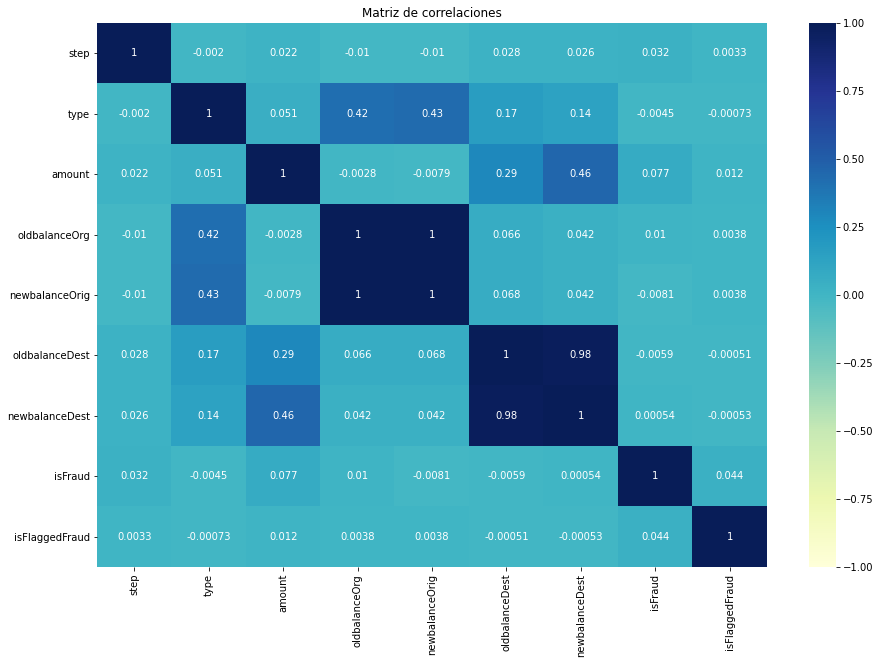

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
ax.set_title("Matriz de correlaciones")
filtro = data.columns != "instant"
sas.heatmap(data[ data.columns[filtro]].corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)

Interpretación:
El heatmap muestra que no existen correlaciones fuertes entre variables de interés. 

# Regresión lineal

In [ ]:
temps = dataLight.amount.unique()
temps

array([9839.64, 1864.28,  181.  , ..., 4541.85,  525.89,  353.62])

In [ ]:
matriz = []
for tmp in temps:
  same_tmp = dataLight[dataLight.amount == tmp].copy()
  isFraud = same_tmp['isFraud']
  total_dia = sum(isFraud)
  matriz.append([tmp, total_dia])

In [ ]:
titulos = ['amount', 'isFraud']
dataset = pd.DataFrame(data=matriz, columns=titulos)
dataset.isFraud = dataset.isFraud / dataset.isFraud.max() # Normalización


In [ ]:
X = np.array(dataset["amount"]).reshape(-1,1)
Y = dataset['isFraud']

In [ ]:
regresion = LinearRegression(fit_intercept=True)
regresion.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat = regresion.predict(X)

In [ ]:
error_ = mean_squared_error(Y, y_hat)
error_

0.0027675597214650875

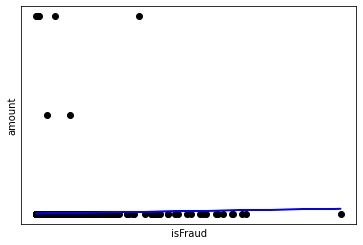

In [ ]:
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.scatter(X, Y, color='black')
plt.plot(X, y_hat, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()



Intepretación: La regresión indica 




# Regresión múltiple

In [ ]:
X = data.iloc[:, [1,2,10]].values #amount y isFlaggedfraud
X

array([[1.00000000e+00, 9.83964000e+03, 0.00000000e+00],
       [1.00000000e+00, 1.86428000e+03, 0.00000000e+00],
       [2.00000000e+00, 1.81000000e+02, 0.00000000e+00],
       ...,
       [3.00000000e+00, 6.31140928e+06, 0.00000000e+00],
       [2.00000000e+00, 8.50002520e+05, 0.00000000e+00],
       [3.00000000e+00, 8.50002520e+05, 0.00000000e+00]])

In [ ]:
y = data.iloc[:, [9]].values
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


4453834
1908786
4453834
1908786


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
multiple_regression = LinearRegression()


In [ ]:
multiple_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hatm = multiple_regression.predict(X_test)

In [ ]:
error_m = mean_squared_error(y_test, y_hatm)
error_m

0.0012860007662634737

In [ ]:
X[100]

array([  1.  , 871.75,   0.  ])

In [ ]:
Y[100]

0.0

In [ ]:
prediccion = multiple_regression.predict([[76.  , 86855.75,   0. ]])
print(prediccion)

[[236.43011601]]


Predicciones de prueba:

# K-MEANS

In [ ]:
#función para calcular la distancia entre los puntos
def distancia(a, b):
    sum = 0
    for i in range(len(b)):
        sum += (b[i] - a[i])**2
    return sum

In [ ]:
#Algoritmo de Kmeans
def kMeans(data, centroids):
    centroidsAsKeys = []
    for c in centroids:
        centroidsAsKeys.append(str(c))
    centroidsDict = {k:[] for k in centroidsAsKeys}
    
    # Datos más cercanos al centroide:
    for d in data:
        closestCentroid = centroids[0]
        smallestD = distancia(d, closestCentroid)
        for c in centroids:
            dist = distancia(d, c)
            if dist < smallestD:
                smallestD = dist
                closestCentroid = c
        centroidsDict[str(closestCentroid)].append(d)   
    return centroidsDict

In [ ]:
#Actualización de Centroides
def actualizaCentroides(theDict):
    newCentroids = []
    for key, pointsList in theDict.items():
        oldCentroid = key
        components = len(pointsList[0])
        newCentroid = []
        for c in range(components):
            newCentroid.append(pointsList[0][c])   
        for p in pointsList:
            for c in range(components):
                newCentroid[c] = newCentroid[c] + p[c] / 2.0
        newCentroids.append(newCentroid)
    return newCentroids

In [ ]:
def inicializacionCentroides(data, k):
    
    usedIndices = []
    centroidsAsKeys = []
    centroids = []
    for c in range(k):
        index = random.randrange(len(data))
        while index in usedIndices:
            index = random.randrange(len(data))
        usedIndices.append(index)
        centroid = data[index]
        centroids.append(centroid)
        centroidsAsKeys.append(str(centroid))
    centroidsDict = {k:[] for k in centroidsAsKeys}
    
    # Datos más cercanos al centroide:
    for d in data:
        closestCentroid = centroids[0]
        smallestD = distancia(d, closestCentroid)
        for c in centroids:
            dist = distancia(d, c)
            if dist < smallestD:
                smallestD = dist
                closestCentroid = c
        centroidsDict[str(closestCentroid)].append(d)   
    return centroidsDict

In [ ]:
da =[]
for i in range(len(dataLight)):
  da.append([int(dataLight.amount[i]), dataLight.isFraud[i] ])
#print(data.amount)
#print(data.isFraud)
#modificar
data2 = [
[-2.273284107, 1.898485259],
[9.285248345,  9.528708054],
[-8.803332803,-1.148882298],
[4.925078368,  2.331671642],
[2.586415013,  1.28128069],
[8.084455493, -0.9130888578],
[0.9276023375, 0.5423613255],
[-7.445467699,-0.7961183742],
[-4.258454366, 9.335165888],
[1.554880819, -2.925452212]]
#print(data)
print(da)


[[9839, 0], [1864, 0], [181, 1], [181, 1], [11668, 0], [7817, 0], [7107, 0], [7861, 0], [4024, 0], [5337, 0], [9644, 0], [3099, 0], [2560, 0], [11633, 0], [4098, 0], [229133, 0], [1563, 0], [1157, 0], [671, 0], [215310, 0], [1373, 0], [9302, 0], [1065, 0], [3876, 0], [311685, 0], [6061, 0], [9478, 0], [8009, 0], [8901, 0], [9920, 0], [3448, 0], [4206, 0], [5885, 0], [5307, 0], [5031, 0], [24213, 0], [8603, 0], [2791, 0], [7413, 0], [3295, 0], [1684, 0], [5758, 0], [110414, 0], [7823, 0], [5086, 0], [5281, 0], [13875, 0], [56953, 0], [5346, 0], [2204, 0], [2641, 0], [23261, 0], [2330, 0], [1614, 0], [9164, 0], [2970, 0], [38, 0], [2252, 0], [62610, 0], [5529, 0], [82940, 0], [4510, 0], [8727, 0], [2599, 0], [4874, 0], [6440, 0], [4910, 0], [6444, 0], [5149, 0], [7292, 0], [47458, 0], [136872, 0], [94253, 0], [2998, 0], [3454, 0], [4316, 0], [2131, 0], [12986, 0], [42712, 0], [77957, 0], [17231, 0], [78766, 0], [224606, 0], [125872, 0], [379856, 0], [1505626, 0], [554026, 0], [147543, 0]

In [ ]:

print("Inicializar datos :")
print(da)
print()
cd = inicializacionCentroides(da, 2)

print("Primera corrida:")
for key, value in cd.items():
    print(key)
    print(value)
    print()
print()

for i in range(1):
    nc = actualizaCentroides(cd)
    print("Nuevo Centroides:")
    print(nc)
    
    print()
    
    cd = kMeans(da, nc)
    print("Diccionario:")
    for key, value in cd.items():
        print("KEY:")
        print(key)
        print("VALUE:")
        print(value)
        print()
    print()

Inicializar datos :
[[9839, 0], [1864, 0], [181, 1], [181, 1], [11668, 0], [7817, 0], [7107, 0], [7861, 0], [4024, 0], [5337, 0], [9644, 0], [3099, 0], [2560, 0], [11633, 0], [4098, 0], [229133, 0], [1563, 0], [1157, 0], [671, 0], [215310, 0], [1373, 0], [9302, 0], [1065, 0], [3876, 0], [311685, 0], [6061, 0], [9478, 0], [8009, 0], [8901, 0], [9920, 0], [3448, 0], [4206, 0], [5885, 0], [5307, 0], [5031, 0], [24213, 0], [8603, 0], [2791, 0], [7413, 0], [3295, 0], [1684, 0], [5758, 0], [110414, 0], [7823, 0], [5086, 0], [5281, 0], [13875, 0], [56953, 0], [5346, 0], [2204, 0], [2641, 0], [23261, 0], [2330, 0], [1614, 0], [9164, 0], [2970, 0], [38, 0], [2252, 0], [62610, 0], [5529, 0], [82940, 0], [4510, 0], [8727, 0], [2599, 0], [4874, 0], [6440, 0], [4910, 0], [6444, 0], [5149, 0], [7292, 0], [47458, 0], [136872, 0], [94253, 0], [2998, 0], [3454, 0], [4316, 0], [2131, 0], [12986, 0], [42712, 0], [77957, 0], [17231, 0], [78766, 0], [224606, 0], [125872, 0], [379856, 0], [1505626, 0], [554

**Referencia:**
https://www.kaggle.com/ntnu-testimon/paysim1


---

